In [32]:
import os
os.environ['WEBBPSF_PATH'] = '/orange/adamginsburg/jwst/webbpsf-data/'
import webbpsf
from webbpsf.utils import to_griddedpsfmodel
from astropy.io import fits
from astropy.modeling.fitting import LevMarLSQFitter
import numpy as np

import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
from astropy.visualization import simple_norm

import photutils.psf

https://stsci-opo.org/STScI-01G6933BG2JKATWE1MGT1TCPJ9.png <-- cool ref

In [33]:
filtername='F335M'
instrument='NIRCAM'

In [34]:
cd /orange/adamginsburg/jwst/jw02731/code/

/orange/adamginsburg/jwst/jw02731/code


In [35]:
path_prefix = '/orange/adamginsburg/jwst/jw02731/background_estimation_cutout/'

In [36]:
epsf_quadratic_filtered_data = fits.getdata(f'{filtername}_ePSF_quadratic_filtered-background-subtracted.fits')
epsf_quadratic_filtered = photutils.psf.EPSFModel(epsf_quadratic_filtered_data)

In [48]:
npsf = 16
oversample = 2
fov_pixels = 256
psf_fn = f'{path_prefix}/{instrument.lower()}_{filtername}_samp{oversample}_nspsf{npsf}_npix{fov_pixels}.fits'
print(psf_fn)


if os.path.exists(psf_fn):
    # As a file
    grid = to_griddedpsfmodel(psf_fn)
elif os.path.exists(psf_fn.replace(".fits", "_nrca5.fits")):
    # apparently even with outfile specified, nrca5 gets appended?
    grid = to_griddedpsfmodel(psf_fn.replace(".fits", "_nrca5.fits"))
else:
    raise ValueError("This is for debugging, we don't want to re-run things")

yy,xx = np.indices(epsf_quadratic_filtered.data.shape)
xc,yc = np.unravel_index(epsf_quadratic_filtered.data.argmax(), epsf_quadratic_filtered.data.shape)
grid.x_0 = xc/oversample
grid.y_0 = yc/oversample
grid.flux = 1
fitter = LevMarLSQFitter()
fitted_gridmod = fitter(model=grid, x=xx/oversample/2 + grid.x_0/oversample, y=yy/oversample/2 + grid.y_0/oversample, z=epsf_quadratic_filtered.data,)
gridmodpsf = (fitted_gridmod(xx/oversample/2 + grid.x_0/oversample, yy/oversample/2 + grid.y_0/oversample))

/orange/adamginsburg/jwst/jw02731/background_estimation_cutout//nircam_F335M_samp2_nspsf16_npix256.fits


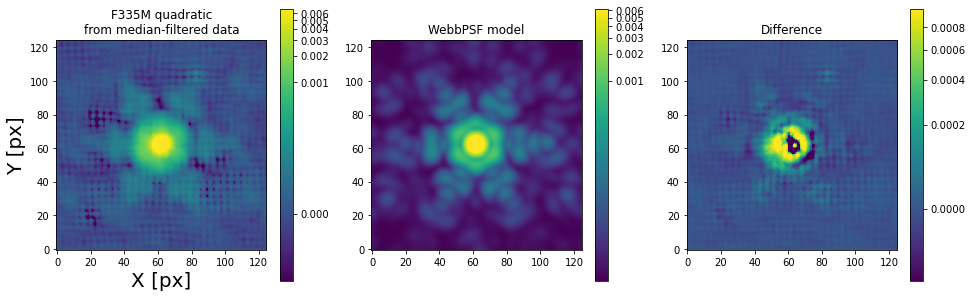

In [49]:
pl.figure(1, figsize=(16,5))
pl.clf()
ax = pl.subplot(1,3,1)
norm_epsf = simple_norm(epsf_quadratic_filtered.data, 'log', percent=99.)
ax.set_title(f"{filtername} quadratic\nfrom median-filtered data")
im = ax.imshow(epsf_quadratic_filtered.data, norm=norm_epsf, origin='lower')
pl.colorbar(mappable=im)
ax.set_xlabel('X [px]', fontsize=20)
ax.set_ylabel('Y [px]', fontsize=20)
ax2 = pl.subplot(1,3,2)
ax2.set_title("WebbPSF model")
dd = gridmodpsf
norm = simple_norm(dd, 'log', percent=99.)
im2 = ax2.imshow(dd, norm=norm, origin='lower')
pl.colorbar(mappable=im2)
ax3 = pl.subplot(1,3,3)
ax3.set_title("Difference")
dd = (epsf_quadratic_filtered.data) - gridmodpsf
norm = simple_norm(dd, 'asinh', percent=99)
im3 = ax3.imshow(dd, norm=norm, origin='lower')
pl.colorbar(mappable=im3)

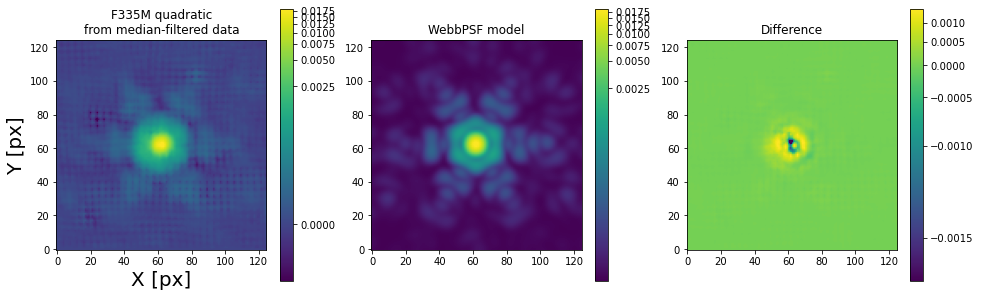

In [50]:
pl.figure(1, figsize=(16,5))
pl.clf()
ax = pl.subplot(1,3,1)
norm_epsf = simple_norm(epsf_quadratic_filtered.data, 'log', percent=99.95)
ax.set_title(f"{filtername} quadratic\nfrom median-filtered data")
im = ax.imshow(epsf_quadratic_filtered.data, norm=norm_epsf, origin='lower')
pl.colorbar(mappable=im)
ax.set_xlabel('X [px]', fontsize=20)
ax.set_ylabel('Y [px]', fontsize=20)
ax2 = pl.subplot(1,3,2)
ax2.set_title("WebbPSF model")
dd = gridmodpsf
norm = simple_norm(dd, 'log', percent=99.95)
im2 = ax2.imshow(dd, norm=norm, origin='lower')
pl.colorbar(mappable=im2)
ax3 = pl.subplot(1,3,3)
ax3.set_title("Difference")
dd = (epsf_quadratic_filtered.data) - gridmodpsf
norm = simple_norm(dd, 'asinh', percent=99.95)
im3 = ax3.imshow(dd, norm=norm, origin='lower')
pl.colorbar(mappable=im3)

In [52]:
import os
os.environ['WEBBPSF_PATH'] = '/orange/adamginsburg/jwst/webbpsf-data/'
with open(os.path.expanduser('~/.mast_api_token'), 'r') as fh:
    os.environ['MAST_API_TOKEN'] = fh.read().strip()
import webbpsf


MAST OPD query around UTC: 2022-07-01T00:00:00.000
                        MJD: 59761.0

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2022063002-NRCA3_FP1-2.fits
	Date (MJD):	 59759.6628
	Delta time:	 -1.3372 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2022070403-NRCA3_FP1-0.fits
	Date (MJD):	 59761.5484
	Delta time:	 0.5484 days
User requested choosing OPD time closest in time to 2022-07-01T00:00:00.000, which is R2022070403-NRCA3_FP1-0.fits, delta time 0.548 days
INFO: MAST API token accepted, welcome Adam Ginsburg [astroquery.mast.auth]
Importing and format-converting OPD from /orange/adamginsburg/jwst/webbpsf-data/MAST_JWST_WSS_OPDs/R2022070403-NRCA3_FP1-0.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point


NameError: name 'plt' is not defined

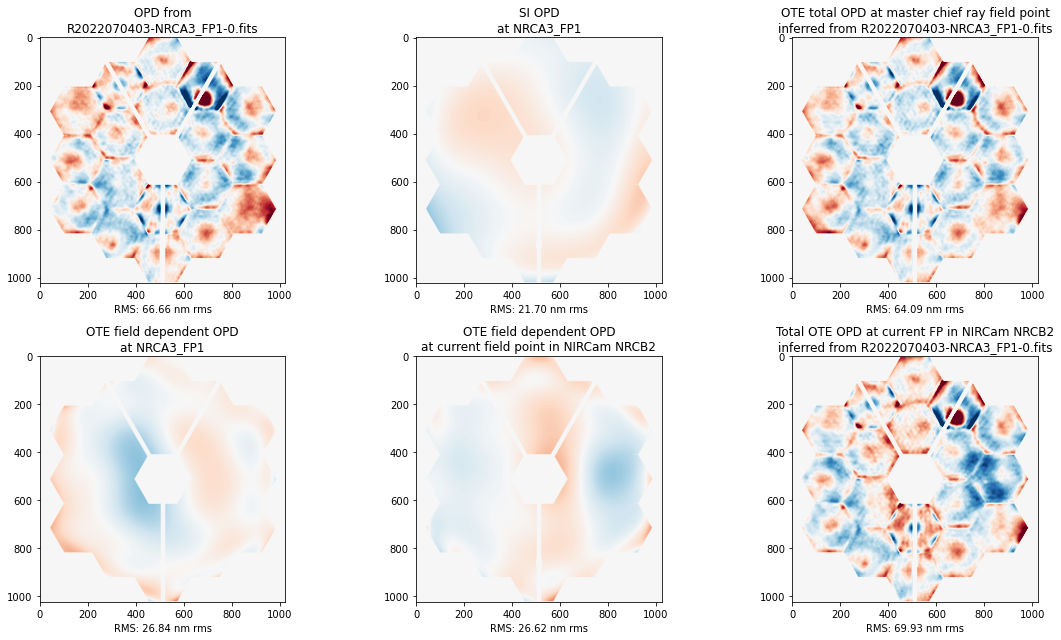

In [53]:
nrc = webbpsf.NIRCam()
nrc.filter='F200W'
nrc.detector = 'NRCB2'
nrc.detector_position = (1024,1024)
nrc.load_wss_opd_by_date('2022-07-01T00:00:00',plot=True)
psf = nrc.calc_psf(fov_pixels=1001)

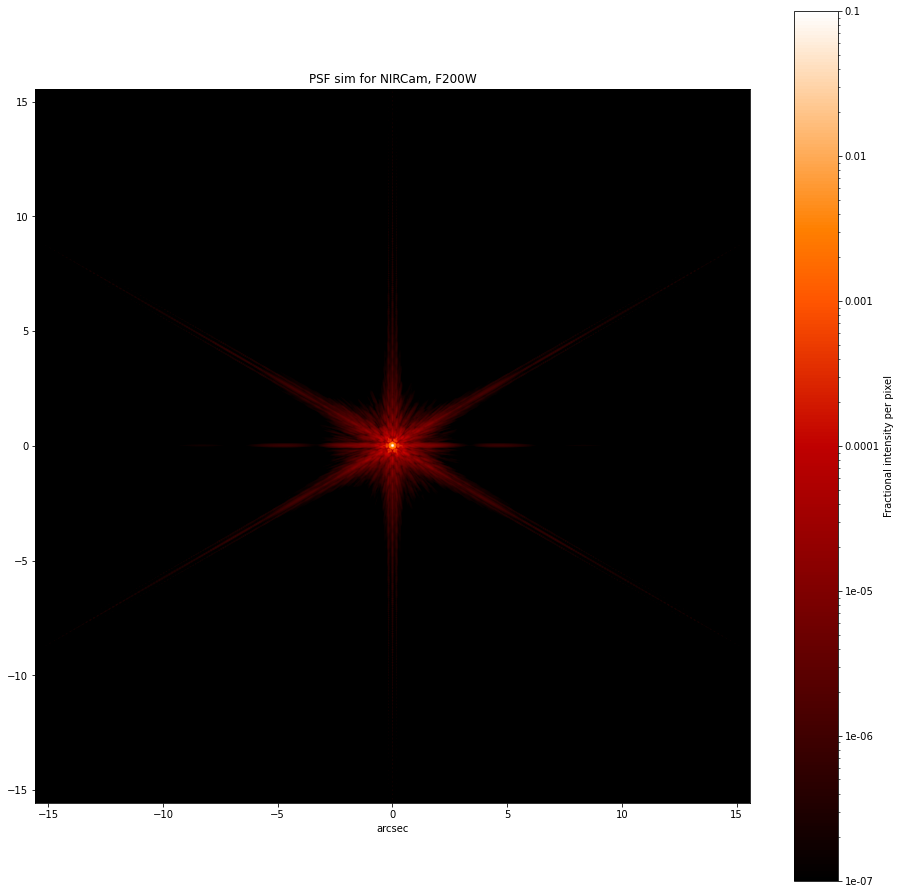

In [54]:
pl.figure(figsize=(16,16))
webbpsf.display_psf(psf, ext=1)